# Cencus Adult Income
Zaki Syaiful Hunafa

RMT-018

## 1. Descriptive

### Objective

The objective of this analysis is to predict whether an individual's income exceeds $50,000 per year or not, based on the demographic and employment-related attributes provided in the Census Adult Income dataset. The analysis will use two models - logistic regression and SVM - to predict income level based on demographic and employment-related attributes. Model performance will be evaluated using accuracy, precision, recall, and F1 score. Using data that queried from Big Query as follows:

`SELECT age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket
FROM bigquery-public-data.ml_datasets.census_adult_income
WHERE workclass != ' ?' 
AND hours_per_week < 100 
LIMIT 35928`

The analysis will use the Census Adult Income dataset, which provides extensive demographic and employment-related information about individuals. Logistic regression and SVM are well-established machine learning models that are commonly used for binary classification tasks. Predicting income level is a crucial task for individuals, organizations, and governments alike. By accurately predicting income level based on demographic and employment-related attributes, this analysis can help identify key factors that affect income level and improve decision-making around issues such as poverty reduction and social mobility. The analysis will be completed within a reasonable time frame, with a focus on ensuring that results are accurate and robust. The timeline will include data preprocessing, EDA, model training and evaluation, and final reporting of results.

In summary, this analysis will use SMART methodologies to predict income level based on demographic and employment-related attributes in the Census Adult Income dataset. By using well-established machine learning models and evaluating model performance using multiple metrics, the analysis will provide valuable insights into the key factors that affect income level and identify the most accurate model for predicting income level.

### Conceptual Problems

1. In logistic regression, the coefficients represent the relationship between each feature (independent variable) and the logarithm of the odds ratio for the dependent variable. These coefficients, also known as beta coefficients, are used to calculate the predicted probability of the outcome (e.g., a binary classification of yes or no) based on the values of the independent variables.

    The coefficient values are estimated using a process called maximum likelihood estimation, which aims to find the values that best fit the data and maximize the likelihood of observing the data given the model. The coefficients are often presented along with their corresponding standard errors, confidence intervals, and p-values, which provide information about the uncertainty and statistical significance of the estimates.

    Interpreting the coefficient values can be challenging, as they represent the change in the log-odds of the outcome for a unit change in the corresponding independent variable, holding all other variables constant. However, exponentiating the coefficient values (i.e., taking the exponential function) yields the odds ratio, which represents the factor by which the odds of the outcome increase for a unit increase in the independent variable. This can provide a more intuitive interpretation of the coefficient values and help identify the most important predictors of the outcome.

2. In Support Vector Machines (SVM), the term "support vector" refers to the data points that lie closest to the decision boundary (or hyperplane) that separates the different classes in a binary classification problem. The support vectors are the key elements of the SVM algorithm, as they define the margin (or the distance between the hyperplane and the closest data points) and the decision boundary.

    The goal of the SVM algorithm is to find the hyperplane that maximizes the margin between the two classes, while minimizing the classification error. The support vectors are the data points that lie on the margin or are misclassified, and they determine the position and orientation of the hyperplane.

    During the training phase of the SVM algorithm, the support vectors are identified by solving a quadratic optimization problem, which involves minimizing the classification error subject to the constraint that the margin is maximized. The support vectors are the data points that lie on the boundary of the margin, and they are the only data points that affect the position and orientation of the hyperplane.

    The use of support vectors in SVM has several advantages, including:

    * SVM can handle high-dimensional data with relatively few support vectors, which makes it computationally efficient and suitable for large datasets.
    * SVM is robust to outliers, as the support vectors are only affected by the data points that lie closest to the decision boundary.
    * SVM can model complex nonlinear decision boundaries by using kernel functions, which transform the data into a higher-dimensional space where the data becomes linearly separable. In this transformed space, the support vectors define the position and orientation of the hyperplane.   

3. In Support Vector Machines (SVM), the kernel parameter specifies the type of kernel function used to transform the input data into a higher-dimensional space where the data becomes linearly separable. The kernel function calculates the similarity (or distance) between pairs of input data points in the transformed space, which is used to construct the decision boundary (or hyperplane) that separates the different classes in a binary classification problem.

    - Linear Kernel = This is the most basic type of kernel. It is used to solve classification problem as well as the fastest.

    - Polinomial Kernel = Similiar with linear kernel, this kernel has a higher dimension which is represented by parameter `d`. This parameter is also polinomial degress

    - Gaussian Radian Basis Function (rbf) = Is used for non-linear data

    - Sigmoid Kernel = Is used for neural network

## 2. Import Libraries

In [999]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to generate correlation for categoty and numerical features
from dython.nominal import associations

# Google cloud setting
from google.cloud import bigquery
from google.oauth2 import service_account

# To Encode Categorical Column
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# To Scalling Numerical Column
from sklearn.preprocessing import MinMaxScaler

# For Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix, classification_report, mean_absolute_error

# SVM
from sklearn.svm import SVC

# Save data
import pickle
import json


credentials = service_account.Credentials.from_service_account_file('harvest-moon-370515-745ab715b948.json')
project_id = "harvest-moon-370515" 
client = bigquery.Client(credentials=credentials, project=project_id)

## 3. Query SQL

In [1000]:
# Generate data
df = client.query('''
SELECT age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket
FROM bigquery-public-data.ml_datasets.census_adult_income
WHERE workclass != ' ?' 
  AND hours_per_week < 100 
LIMIT 35928
''').to_dataframe()

# save csv
df.to_csv('h8dsft_P1G2_zaki.csv')
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K


From the above dataset, here is the description of each column:

Name | Definition
---|---
`age` | Age of person
`workclass` | Nature of employment
`education` | Level of education completed
`education_num` | Estimated years of education completed based on the value of the education field
`marital_status` | Marital status
`occupation` | Occupation category
`relationship` | Relationship to the household
`race` | Race
`sex` | Gender
`capital_gain` | Amount of capital gains
`capital_loss` | Amount of capital loss
`native_country` | Country of birth
`income_bracket` | Either ">50K" or "<=50K" based on income in dollar yearly

## 4. Data Loading

In [1001]:
df.shape

(30725, 14)

In [1002]:
# first 10 rows on df
df.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,<=50K
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,<=50K
3,28,Private,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,<=50K
4,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,<=50K
5,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
6,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K
7,27,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,Portugal,<=50K
8,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
9,30,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,Portugal,<=50K


In [1003]:
# 10 last rows on df
df.tail(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
30715,23,Private,Some-college,10,Never-married,Adm-clerical,Other-relative,Asian-Pac-Islander,Female,0,0,24,Vietnam,<=50K
30716,22,Private,Some-college,10,Never-married,Tech-support,Other-relative,Asian-Pac-Islander,Female,0,0,32,United-States,<=50K
30717,25,Private,Some-college,10,Never-married,Craft-repair,Other-relative,Asian-Pac-Islander,Female,0,0,40,Cambodia,<=50K
30718,22,Private,Some-college,10,Never-married,Craft-repair,Other-relative,Asian-Pac-Islander,Female,0,0,40,Vietnam,<=50K
30719,48,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Cambodia,>50K
30720,46,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,India,<=50K
30721,45,Private,Some-college,10,Married-civ-spouse,Craft-repair,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K
30722,32,Private,Some-college,10,Married-civ-spouse,Sales,Other-relative,Asian-Pac-Islander,Female,0,0,40,Greece,<=50K
30723,30,Self-emp-not-inc,Some-college,10,Never-married,Sales,Other-relative,Asian-Pac-Islander,Male,0,2258,40,South,<=50K
30724,20,Self-emp-not-inc,Some-college,10,Never-married,Prof-specialty,Other-relative,Asian-Pac-Islander,Female,0,0,20,South,<=50K


In [1004]:
df.occupation.unique()

array([' Other-service', ' Priv-house-serv', ' Protective-serv',
       ' Machine-op-inspct', ' Tech-support', ' Exec-managerial',
       ' Farming-fishing', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Handlers-cleaners', ' Prof-specialty', ' ?',
       ' Armed-Forces'], dtype=object)

Here the occupation has `white space` on front of the value which I'm afraid might contribute to the future analysis of this dataset.

In [1005]:
# delete whitespace in df
cols = df.columns[df.dtypes == 'O']
df[cols] = df[cols].apply(lambda x: x.str.strip())

In [1006]:
df.occupation.unique()

array(['Other-service', 'Priv-house-serv', 'Protective-serv',
       'Machine-op-inspct', 'Tech-support', 'Exec-managerial',
       'Farming-fishing', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Prof-specialty', '?',
       'Armed-Forces'], dtype=object)

In [1007]:
# analyze cardinality
features = df.columns.to_list()
for col in features:
    p = df[col].value_counts(normalize=True)*100

    print(col)
    print()
    print(p)
    print('-'*40)

age

36    2.847844
31    2.828316
34    2.799024
33    2.763222
37    2.763222
        ...   
82    0.022783
83    0.016273
85    0.009764
88    0.009764
86    0.003255
Name: age, Length: 72, dtype: float64
----------------------------------------
workclass

Private             73.868186
Self-emp-not-inc     8.270138
Local-gov            6.812042
State-gov            4.224573
Self-emp-inc         3.632221
Federal-gov          3.124491
Without-pay          0.045566
Never-worked         0.022783
Name: workclass, dtype: float64
----------------------------------------
education

HS-grad         32.445891
Some-college    22.056957
Bachelors       16.865745
Masters          5.451587
Assoc-voc        4.299430
11th             3.440195
Assoc-acdm       3.319772
10th             2.711147
7th-8th          1.868186
Prof-school      1.816111
9th              1.506916
Doctorate        1.295362
12th             1.279089
5th-6th          0.986168
1st-4th          0.507730
Preschool        0.149715


There is still `?` values in some of the columns which will be dropped. The collumns are in follows:
 * ccupancy: 0.02 %
 * native_country: 1.8 %
 

In [1008]:
# Drop value '?'
df = df[df != '?']

In [1009]:
# Check NaN values in each columns
df.isnull().sum()

age                 0
workclass           0
education           0
education_num       0
marital_status      0
occupation          7
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    556
income_bracket      0
dtype: int64

In [1010]:
# drop NaN values in native_country
df.dropna(subset=['native_country', 'occupation'], inplace=True)

In [1011]:
# Get percentage of 0 values in each column
for col in df.columns:
    zero_count = df[df[col] == 0].shape[0]
    total_count = df.shape[0]
    print(f"{col}: {zero_count/total_count*100:.2f}%")

age: 0.00%
workclass: 0.00%
education: 0.00%
education_num: 0.00%
marital_status: 0.00%
occupation: 0.00%
relationship: 0.00%
race: 0.00%
sex: 0.00%
capital_gain: 91.59%
capital_loss: 95.27%
hours_per_week: 0.00%
native_country: 0.00%
income_bracket: 0.00%


Here `capital_gain` and `capital_loss` has the highest 0 values amongst other features in the dataset. This specific issue will be furtherly analyze to avoid contributing high bias towards the dataset.

## 5. Exploratory Data Analysis (EDA)

To ease the analysys, I will change value in income_bracket:
 - 0 for <= 50K
 - 1 for > 50K

In [1012]:
df['income_bracket'] = df['income_bracket'].apply(lambda x: 0 if x == '<=50K' else 1)
df.head()


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,0
1,77,Private,9th,5,Married-civ-spouse,Priv-house-serv,Wife,Black,Female,0,0,10,United-States,0
2,38,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,24,Haiti,0
3,28,Private,9th,5,Married-civ-spouse,Protective-serv,Wife,Black,Female,0,0,40,United-States,0
4,37,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,Black,Female,0,0,48,United-States,0


In [1013]:
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week,income_bracket
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [1014]:
df.describe(include='O')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
count,30162,30162,30162,30162,30162,30162,30162,30162
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22286,9840,14065,4038,12463,25933,20380,27504


* The max of `capital_gain` seems a little bit odd since it's `99,999`. Since I don't have sources to validate the data I'd consider it as outliers. And in both `capital_gain` and `capital_loss` in the dataset seemed not distributed normally to the extreme since all the quantiles are shown as `0`.

* The average of people who are in dataset is `38 years old` and working `40 hours per-week`. Meaning that the people in the US seems to still be working for quite sometimes instead of retired in the age of `>50 years old`, and if we took 5 workdays the average of the US population are working approximately `8 hours a day`.

* The majority population in the dataset are `white-american` that `married`. Interestingly, the majority were `high school graduate`.


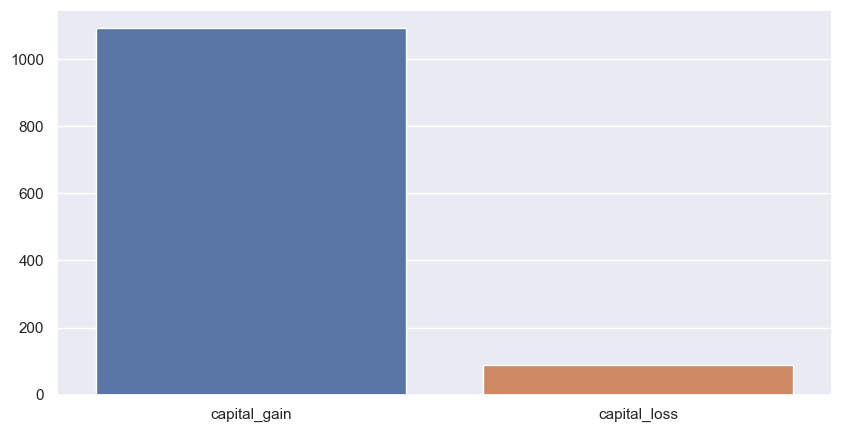

In [1015]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df[['capital_gain', 'capital_loss']], errorbar=None)
plt.show()

The dispoportion data is very significance between `capital_gain` and `capital_loss`. This surely will contribute to the bias of the target later on. 

In [1016]:
# Create function to create histplot and boxplot
def diagnostic(df, var):
    plt.figure(figsize=(16,4))

    # Hist
    plt.subplot(1,2,1)
    sns.histplot(df[var], bins=30)
    plt.title('Histogram ' + var)

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[var])
    plt.title('Boxplot ' + var) 

    plt.show
    print('Skewness of', var, df[var].skew())

Train-Set Before Trimming
Skewness of age 0.5302277818340089
Skewness of education_num -0.3053786546961552
Skewness of hours_per_week 0.3308693044034244
Skewness of income_bracket 1.161408422919472


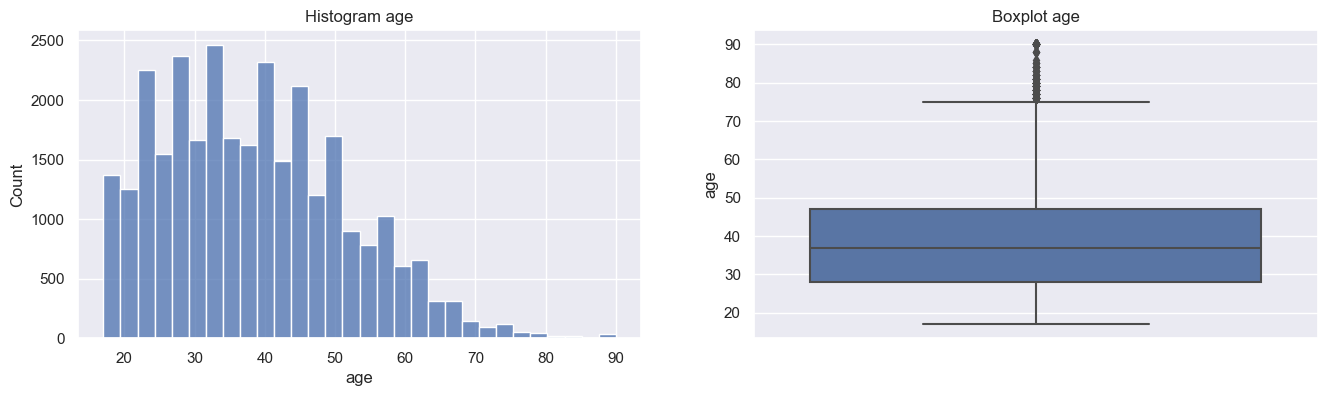

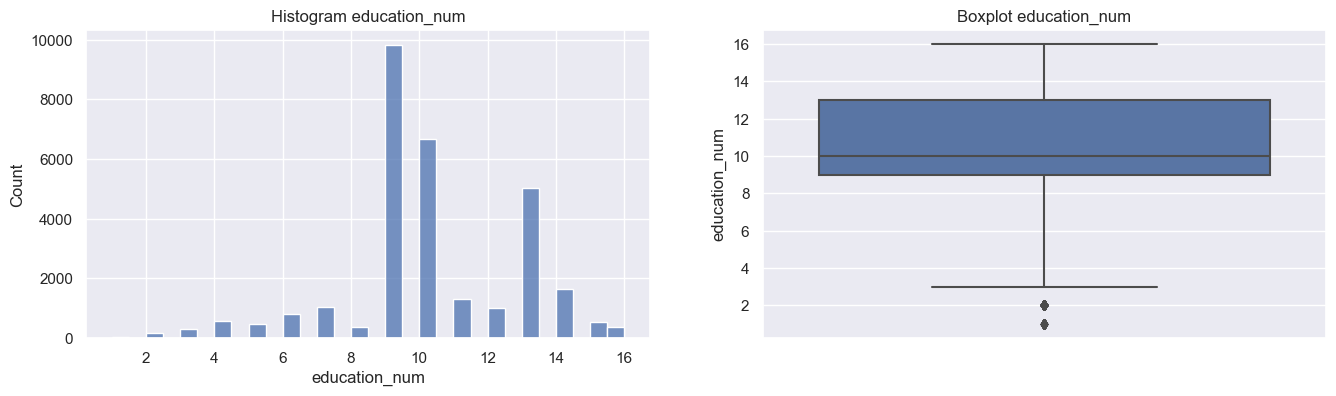

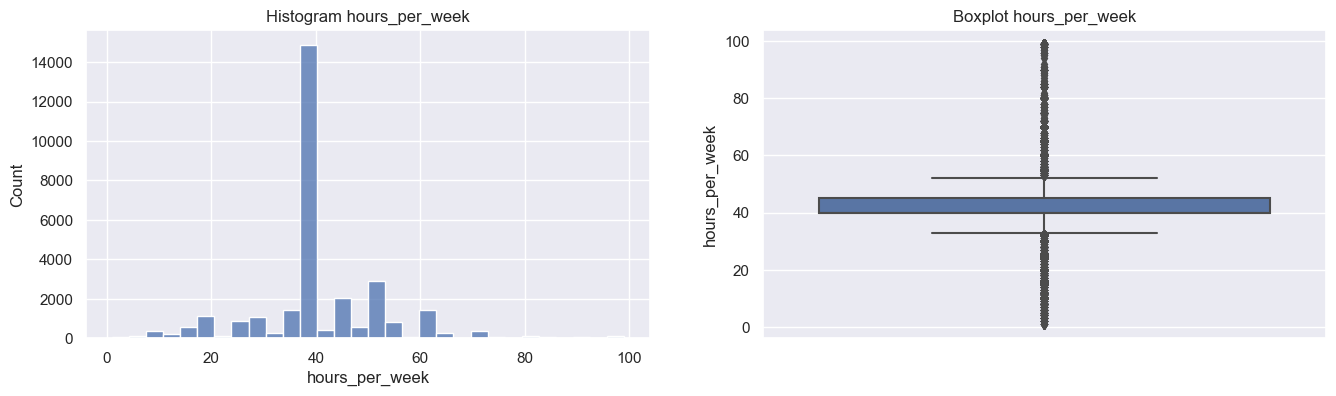

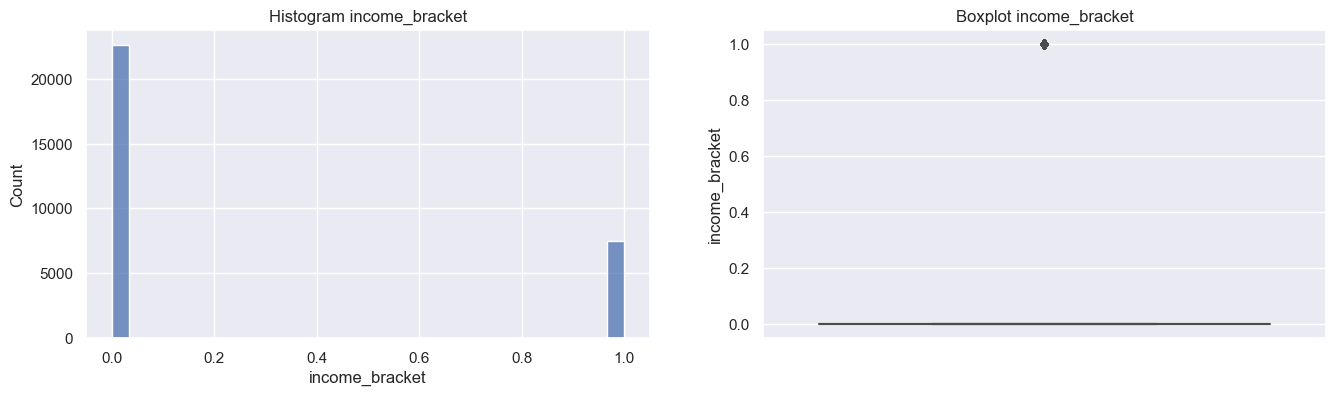

In [1017]:
# Distribution of Data
print('Train-Set Before Trimming')
diagnostic(df, 'age')
diagnostic(df, 'education_num')
diagnostic(df, 'hours_per_week')
diagnostic(df, 'income_bracket')

Among 4 features that I analyze, only `hours_per_week` has normal distribution for its value. Meanwhile `age` is skewed to the right and `education_num` is skewed to the left. To handle this, I will do following:   
* `Hours Per Week`: Using Z-score
* `Education Num` and `Age` using Tukey rule:IQR

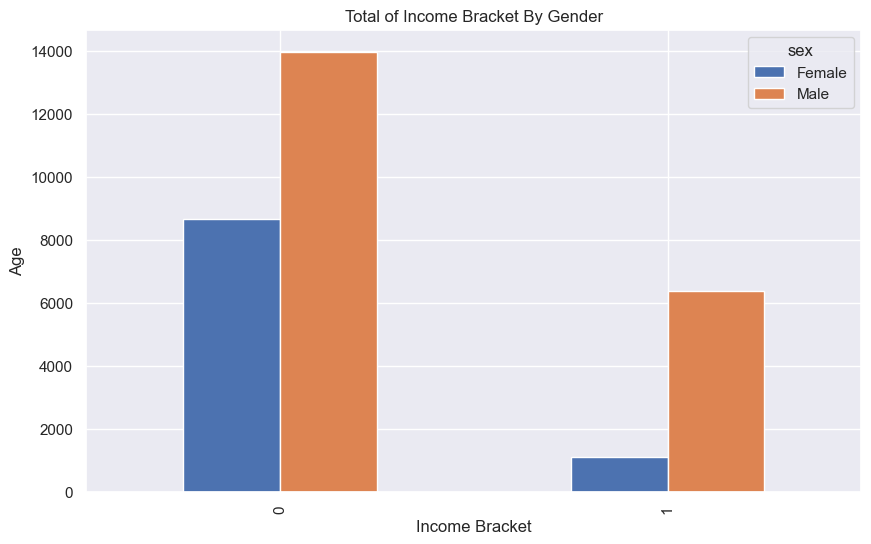

In [1018]:
# Create a barplot of average age in income bracket with hue=sex
df.groupby(['income_bracket', 'sex'])['age'].count().unstack().plot(kind='bar', figsize=(10,6))
plt.title('Total of Income Bracket By Gender')
plt.xlabel('Income Bracket')
plt.ylabel('Age')
plt.show()

We can safely assume if the majority of working people in the US is still dominated by `Male` and have income `less than 50K USD in a year`

In [1019]:
df.groupby(['marital_status', 'income_bracket'])['income_bracket'].count()

marital_status         income_bracket
Divorced               0                 3762
                       1                  452
Married-AF-spouse      0                   11
                       1                   10
Married-civ-spouse     0                 7666
                       1                 6399
Married-spouse-absent  0                  339
                       1                   31
Never-married          0                 9256
                       1                  470
Separated              0                  873
                       1                   66
Widowed                0                  747
                       1                   80
Name: income_bracket, dtype: int64

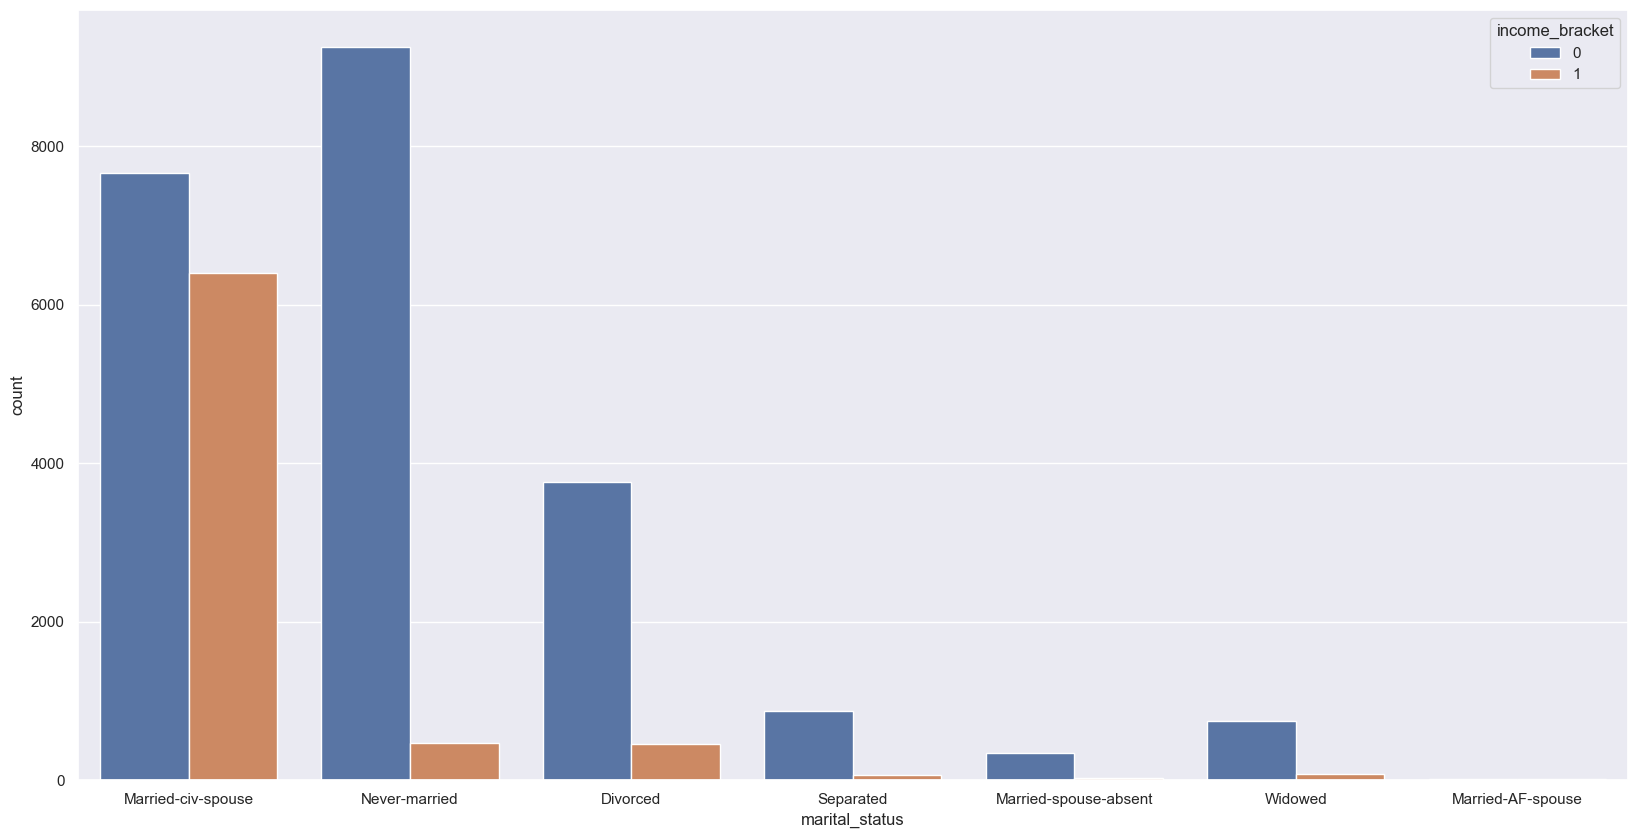

In [1020]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=df, x='marital_status', hue='income_bracket')
plt.show()

The majority of people who have income above 50K USD yearly is married people. While people who are still single wither because of `divorced` or have issues with their relationship have income below 50K yearly.

In [1021]:
df.isna().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

There is no null values.

In [1022]:
df.nunique()

age                72
workclass           7
education          16
education_num      16
marital_status      7
occupation         14
relationship        6
race                5
sex                 2
capital_gain      118
capital_loss       90
hours_per_week     94
native_country     41
income_bracket      2
dtype: int64

C:\Users\MSI GAMING\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\MSI GAMING\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args,

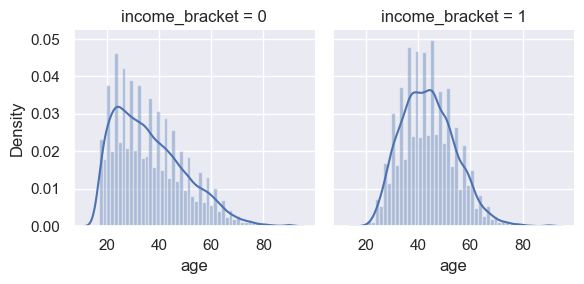

In [1023]:
# Explore Age vs Income
g = sns.FacetGrid(df, col='income_bracket')
g = g.map(sns.distplot, "age")
plt.show()

The distribution for people who earn more than 50K USD yearly is more normally distributed compare to those who earned less.

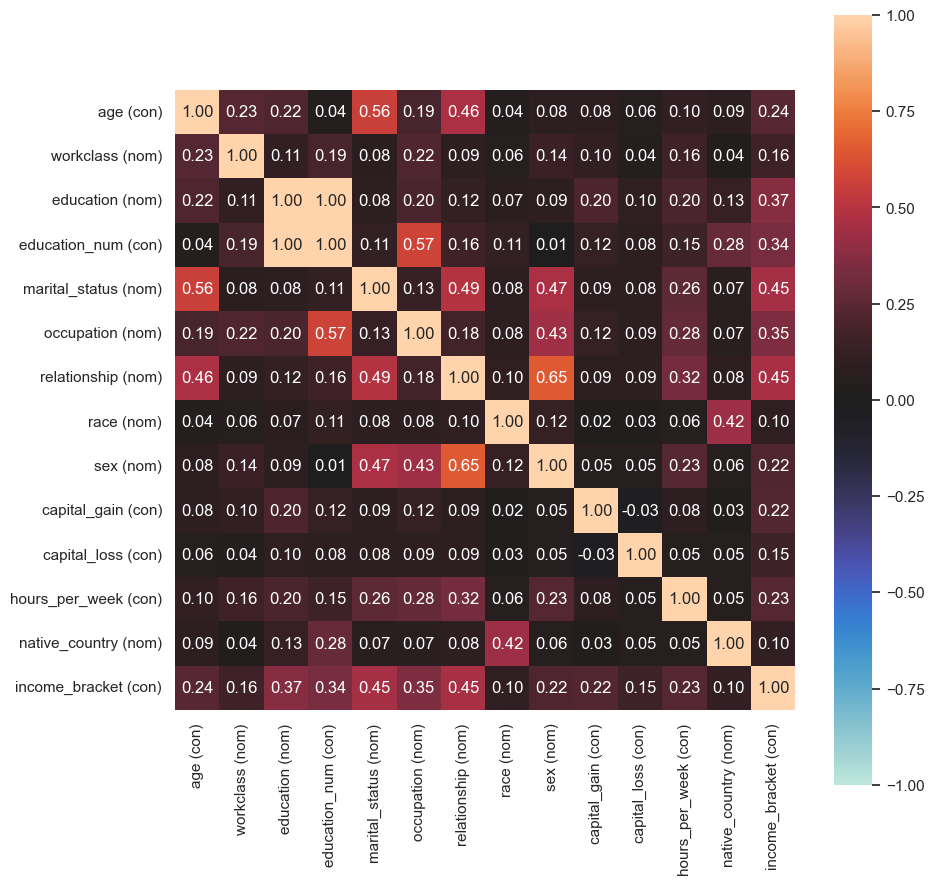

In [1024]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(10,10), mark_columns=True)

The higher someone pursue their study the more positive the impcat to their earnings. We can see the `education_num` is postively correlated to the `income_bracket`

<Figure size 2000x1000 with 0 Axes>

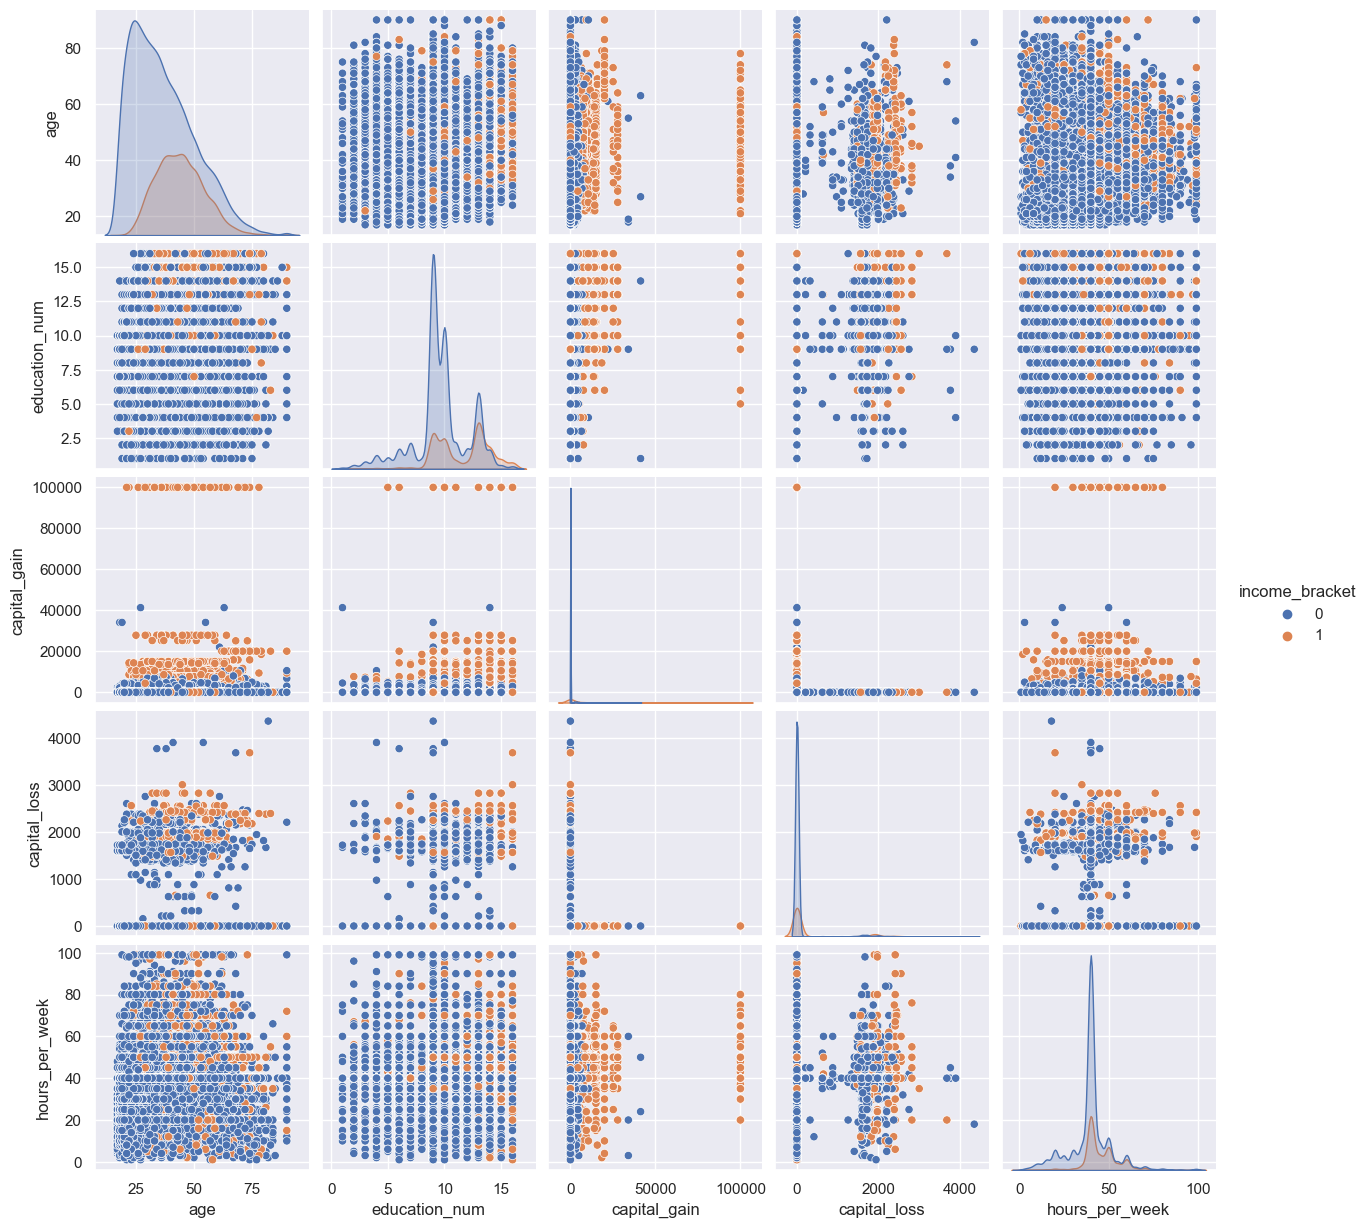

In [1025]:
temp = df[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'income_bracket']]
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.0)
sns.pairplot(temp, hue='income_bracket', palette="deep") 
plt.show()


The distribution if both capital_gain and capital_losss is very extreme in terms of the distribution. And the value `0` is overly centered.

## 6. Feature Engineering

In [1026]:
X = df.drop(['income_bracket'], axis=1)
y = df[['income_bracket']]

In [1027]:
for col in X:
    p = X[col].sort_values().unique()

    print(col)
    print()
    print(p)
    print('-'*40)

age

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 90]
----------------------------------------
workclass

['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov' 'Without-pay']
----------------------------------------
education

['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
----------------------------------------
education_num

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
----------------------------------------
marital_status

['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
----------------------------------------
occupation

['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Fa

### Cardinality on Age

I will evide age based on certain category:
 * <= 19 is teenager
 * 20-30 is young adult
 * 31-45 is adult
 * 46-65 is middle age
 * `>` 65 is old people

In [1028]:
# create age_group for X
X['age_group'] = ''

# assign category accordingly for X_train
X.loc[X['age'] <= 19, 'age_group'] = 'teenager'
X.loc[(X['age'] > 19) & (X['age'] <= 30), 'age_group'] = 'young adult'
X.loc[(X['age'] > 30) & (X['age'] <= 45), 'age_group'] = 'adult'
X.loc[(X['age'] > 45) & (X['age'] <= 65), 'age_group'] = 'middle age'
X.loc[X['age'] > 65, 'age_group'] = 'old people'



### Cardinality on native country

I will group based on continent

In [1029]:
X.native_country.unique()

array(['United-States', 'Haiti', 'Portugal', 'Yugoslavia',
       'Dominican-Republic', 'Trinadad&Tobago', 'Mexico', 'Guatemala',
       'Puerto-Rico', 'Canada', 'Poland', 'Outlying-US(Guam-USVI-etc)',
       'India', 'El-Salvador', 'Nicaragua', 'Philippines', 'Cuba',
       'Columbia', 'Vietnam', 'Jamaica', 'Ireland', 'China', 'Japan',
       'Italy', 'Peru', 'England', 'Ecuador', 'Greece', 'Germany', 'Hong',
       'Scotland', 'South', 'Honduras', 'Cambodia', 'Thailand', 'Laos',
       'Hungary', 'Iran', 'Taiwan', 'France', 'Holand-Netherlands'],
      dtype=object)

In [1030]:
# Create a new column to store the region for X
X['region'] = ''

# Set the region for each country for X_train
X.loc[X['native_country'].isin(['Cambodia', 'Japan', 'China', 'Hong', 'India', 'Iran', 'Laos', 'Philippines', 'Taiwan', 'Vietnam', 'Thailand']), 'region'] = 'Asia'
X.loc[X['native_country'].isin(['England', 'France', 'Germany', 'Greece', 'Holand-Netherlands', 'Hungary', 'Ireland', 'Italy', 'Poland', 'Portugal', 'Yugoslavia', 'Scotland']), 'region'] = 'Europe'
X.loc[X['native_country'].isin(['Columbia', 'Cuba', 'Dominican-Republic','Ecuador', 'El-Salvador','Guatemala','Haiti','Honduras','Mexico', 'Nicaragua', 'Peru','Puerto-Rico', 'South','Trinadad&Tobago', 'United-States','Jamaica', 'Canada', 'Outlying-US(Guam-USVI-etc)']), 'region'] = 'North America'


In [1031]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 30724
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   education_num   30162 non-null  int64 
 4   marital_status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital_gain    30162 non-null  int64 
 10  capital_loss    30162 non-null  int64 
 11  hours_per_week  30162 non-null  int64 
 12  native_country  30162 non-null  object
 13  age_group       30162 non-null  object
 14  region          30162 non-null  object
dtypes: int64(5), object(10)
memory usage: 3.7+ MB


### Split Train-set and Test-set

In [1032]:
# Split Test-set and Train-set
# Since the 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y )
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)
print(' ')
print('Train Size: ', y_train.shape)
print('Test Size: ', y_test.shape)

Train Size:  (24129, 15)
Test Size:  (6033, 15)
 
Train Size:  (24129, 1)
Test Size:  (6033, 1)


### Trimming for Distributed Normally Data

In [1033]:
# Handliong X_test
upper_limit_train= X_train['hours_per_week'].mean() + 3*df['hours_per_week'].std() 
lower_limit_train= X_train['hours_per_week'].mean() - 3*df['hours_per_week'].std() 

outliers_hours_per_week = np.where(X_train['hours_per_week'] > upper_limit_train, True, np.where(X_train['hours_per_week'] < lower_limit_train, True, False))

# Let's trimm the dataset
X_train_new = X_train.loc[~(outliers_hours_per_week)]
y_train_new = y_train.loc[~(outliers_hours_per_week)]

### Trimming for Skewed Data

In [1034]:
# Since age and education_num is skewed to the right, we'll be using tukey rle: IQR
def find_skew (data, var, distance):
    q1 = data[var].quantile(0.25)
    q3 = data[var].quantile(0.75)

    iqr = q3-q1
    lower_boundaries = q1 - distance * iqr
    upper_boundaries = q3 + distance * iqr

    return upper_boundaries, lower_boundaries

#### Trim for X_train

In [1035]:
# Looking for age outliers, using the interquantile proximity rule IQR * 1.5, for `price` in the dataset
age_upper_limit, age_lower_limit= find_skew(X_train_new, 'age', 1.5)
print('Upper and lower boundaries in age for 1.5 times inter-quantile')
print(age_upper_limit, age_lower_limit)
print('')

# Looking for education_num outliers, using the interquantile proximity rule IQR * 1.5, for `distance` in the dataset
education_num_upper_limit, education_num_lower_limit = find_skew(X_train_new, 'education_num', 1.5)
print('Upper and lower boundaries in education_num for 1.5 times inter-quantile')
print(education_num_upper_limit, education_num_lower_limit)
print('')

Upper and lower boundaries in age for 1.5 times inter-quantile
75.5 -0.5

Upper and lower boundaries in education_num for 1.5 times inter-quantile
19.0 3.0



In [1036]:
# Define Outliers
# Outliers for Price
outliers_age = np.where(X_train_new['age'] > age_upper_limit, True,
                          np.where(X_train_new['age'] < age_lower_limit, True, False))

# Outliers for Price
outliers_education = np.where(X_train_new['education_num'] > education_num_upper_limit, True,
                          np.where(X_train_new['education_num'] < education_num_lower_limit, True, False))

# Let's trimm the dataset
X_train_trimmed = X_train_new.loc[~(outliers_age + outliers_education)]
y_train_trimmed = y_train_new.loc[~(outliers_age + outliers_education)]

In [1037]:
# Drop unused column
# drop column age and native country
X_train_trimmed = X_train_trimmed.drop(['age', 'native_country', 'capital_gain', 'capital_loss'], axis=1)
X_test = X_test.drop(['age', 'native_country', 'capital_gain', 'capital_loss'], axis=1)

In [1038]:
# numerical column
num_cols = ['hours_per_week']

# categorical column
cat_cols = ['occupation', 'race', 'region', 'sex', 'workclass', 'relationship', 'marital_status']

# category ordinal
cat_ord_cols = ['education', 'education_num', 'age_group']

In [1039]:
# Define Train-set and Test-set
# X-set for Numerical Column
X_train_num = X_train_trimmed[num_cols]
X_test_num = X_test[num_cols]

# X-set for Categorical Column
X_train_cat = X_train_trimmed[cat_cols]
X_test_cat = X_test[cat_cols]

# X-set for Categorical Ordinal Column
X_train_cat_ord = X_train_trimmed[cat_ord_cols]
X_test_cat_ord = X_test[cat_ord_cols]

### Encoding Category Ordinal

In [1040]:
# Feature encoding using OrdinalEncoder
encoder = OrdinalEncoder(categories=[['9th', '10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th',
       'HS-grad', 'Masters', 'Assoc-voc', 'Bachelors', 'Doctorate',
       'Preschool', 'Assoc-acdm', 'Prof-school', 'Some-college'], # col education
       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], # col education_num
       ['adult', 'middle age', 'old people', 'teenager', 'young adult'], # col age_group
       ])

encoder.fit(X_train_cat_ord)
X_train_catold_encoded = encoder.transform(X_train_cat_ord)
X_test_catold_encoded = encoder.transform(X_test_cat_ord)

### Encoding Category 

In [1041]:
ohe = OneHotEncoder(handle_unknown= 'ignore',sparse=False)
ohe.fit(X_train_cat)

c:\Users\MSI GAMING\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [1042]:
# Assign to Train-set and Test-set
X_train_cat_encoded = ohe.transform(X_train_cat)
X_test_cat_encoded = ohe.transform(X_test_cat)

In [1043]:
ohe.categories_

[array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
       dtype=object),
 array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
        'White'], dtype=object),
 array(['Asia', 'Europe', 'North America'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc',
        'Self-emp-not-inc', 'State-gov', 'Without-pay'], dtype=object),
 array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
        'Unmarried', 'Wife'], dtype=object),
 array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object)]

In [1044]:
# Concatenate all arrays into a single 1D array
features_label = np.concatenate(ohe.categories_).tolist()

print(features_label)


['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White', 'Asia', 'Europe', 'North America', 'Female', 'Male', 'Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay', 'Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife', 'Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']


### Scalled Numerical Column

In [1045]:
# Feature Scalling using MniMaxScaller
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

### Joined All Encoded and Scalling

In [1046]:
# Join array for scaled and encoded features
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded, X_train_catold_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded, X_test_catold_encoded], axis=1)

# Create dataframe for all joined array
X_train_final_df = pd.DataFrame(X_train_final, columns = [num_cols + features_label + cat_ord_cols])
pd.set_option('display.max_columns', None)
X_train_final_df.head()

,hours_per_week,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Asia,Europe,North America,Female,Male,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,education,education_num,age_group
0,0.845070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0
1,0.774648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,12.0,0.0
2,0.464789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,12.0,4.0
3,0.492958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,11.0,1.0
4,0.492958,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,9.0,0.0


## 7. Model Definition

In [1047]:
# Create the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Create the SVM model
svc_linear = SVC(kernel='linear', gamma="auto", C= 1)


## 8. Model Training

In [1048]:
# Train the model on the training data
logreg.fit(X_train_final, y_train_trimmed)
y_pred_logreg = logreg.predict(X_test_final)


# Train the model on the training data
svc_linear.fit(X_train_final, y_train_trimmed)# Make prediction
y_pred_linear = svc_linear.predict(X_test_final)# Evaluate our model


c:\Users\MSI GAMING\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MSI GAMING\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 9. Model Evaluation

In [1049]:
# Linear Logistic Regression
print('Evaluation: Linear Logistic Regression')
print('Training score: {:.4f}'.format(logreg.score(X_train_final, y_train_trimmed)))
print('Test score: {:.4f}'.format(logreg.score(X_test_final, y_test)))

print(classification_report(y_test, y_pred_logreg))

Evaluation: Linear Logistic Regression
Training score: 0.8286
Test score: 0.8324
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      4531
           1       0.70      0.58      0.63      1502

    accuracy                           0.83      6033
   macro avg       0.78      0.75      0.76      6033
weighted avg       0.83      0.83      0.83      6033



In [1050]:
# SVC Linear Kernel
print("Evaluation: Linear kernel")
print('Training score: {:.4f}'.format(svc_linear.score(X_train_final, y_train_trimmed)))
print('Test score: {:.4f}'.format(svc_linear.score(X_test_final, y_test)))

print(classification_report(y_test,y_pred_linear))

Evaluation: Linear kernel
Training score: 0.8275
Test score: 0.8329
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4531
           1       0.69      0.59      0.64      1502

    accuracy                           0.83      6033
   macro avg       0.78      0.75      0.76      6033
weighted avg       0.83      0.83      0.83      6033



- Using the logistic regression: we get 83% correct predictions
- The precision seemed to have high bias toward true positives towards predicting people that earned less than 50K USD for both logistic regression and SVC
- In the precision also showed positively towards people that earned less than 50K up to 87%

<Axes: title={'center': 'Logistic Regression'}>

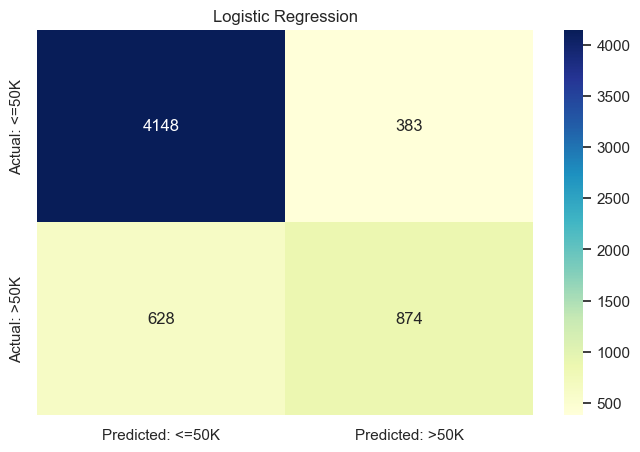

In [1051]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_logreg)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted: <=50K','Predicted: >50K'],index=['Actual: <=50K','Actual: >50K'])
plt.figure(figsize = (8,5))
plt.title('Logistic Regression')
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

<Axes: title={'center': 'SVM'}>

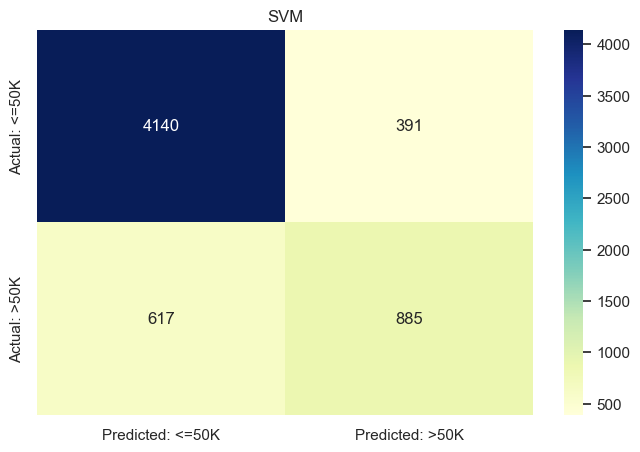

In [1052]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_linear)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted: <=50K','Predicted: >50K'],index=['Actual: <=50K','Actual: >50K'])
plt.figure(figsize = (8,5))
plt.title('SVM')
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [1053]:
baseline = linreg.coef_[0]

In [1054]:
pd.DataFrame(baseline, 
             X_train_final_df.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)


,coef
hours_per_week,0.230575
Wife,0.210904
Married-AF-spouse,0.205233
Exec-managerial,0.135760
Self-emp-inc,0.123114
Prof-specialty,0.109226
Husband,0.100191
Federal-gov,0.090670
Protective-serv,0.061849
Tech-support,0.057809


Here we can see the coefficient of hours_per_week of the data towards the possibility of he/she could earn more than 50K USD yearly. Apparently married women that worked as executive manegerial seemd to have higher probability of earning more than 50K USD yearly compare to male.

## 10. Model Saving

In [1055]:
with open('model_log_reg.pkl', 'wb') as file_1:
    pickle.dump(logreg, file_1)

with open('svc_linear.pkl', 'wb') as file_2:
    pickle.dump(svc_linear, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
    pickle.dump(scaler, file_3)

with open('model_encoder_ord.pkl', 'wb') as file_4:
    pickle.dump(encoder, file_4)

with open("model_encoder.pkl", "wb") as file_5: 
    pickle.dump(ohe, file_5)

with open('list_num_cols.txt', 'w') as file_6:
    json.dump(num_cols, file_6)

with open('list_cat_cols.txt', 'w') as file_7:
    json.dump(cat_cols, file_7)

with open('list_cat_cols_ord.txt', 'w') as file_8:
    json.dump(cat_ord_cols, file_8)

# Conclusion

Based on the analysis, there are several recommendations that can be made to improve the model's performance:

 * Better distribution of the data: some features that seemed to be a good features for our model such as capital gain and capital loss are unfortunately can't be used. As features that recorded specifically the cash flows of the income and the spending/loss, this surely will affect the model a lot.

 * Investigating the extreme distribution of capital_gain and capital_loss: Further investigation is needed to determine the cause of the extreme distribution of these variables, which may be negatively impacting the model's performance.

 * Implement random search and grid searc as model improvement for both models to improve the overall score.

 * Consider additional features: The analysis shows that marital_status, sex, and education_num have a significant impact on the target variable. Adding additional features such as occupation or industry may further improve the model's performance.

 * Based on the analysis, it is recommended to use logistic regression as the model for predicting the target variable. However, it is important to note that the precision of the model is biased towards true negatives, which may result in a higher rate of false negatives. Therefore, it is recommended to consider other metrics such as recall or F1-score to evaluate the model's performance.

 * Finally, the coefficient of hours_per_week indicates that married women who work in executive managerial positions have a higher probability of earning more than 50K USD yearly. This information can be used to target specific demographic groups for marketing or other purposes.

# Reference

 - https://medium.com/towards-artificial-intelligence/linear-models-for-classification-logistic-regression-with-without-sklearn-library-6ec9a5556023
 - https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
 - https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200
 - https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1
 - https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec